This notebook is used to analyze the results of the multi-model experiments.

In [9]:
import sys
sys.path.append("../")

from pathlib import Path
import json
from src.ensembles import MODEL_GROUPS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


RESULTS_DIR = Path("../smoothie_data/multi_model_results")

In [12]:
def plot_exp(exp_dir: Path, metric: str):
    scores = []
    for model_group in MODEL_GROUPS:
        scores_fpath = exp_dir / model_group / "scores.json"
        scores.append(json.loads(scores_fpath.read_text())[metric])
    
    keys = ["pick_random"]
    
    data = []
    for key in keys:
        for model_group, score_dict in zip(MODEL_GROUPS, scores):
            data.append({"Method": key, "Score": score_dict[key], "Model Group": model_group, "Metric": metric})

    df = pd.DataFrame(data)
    
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x="Method", y="Score", data=df, capsize=0.1, errorbar="sd")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.title("Performance Comparison of Different Methods")
    plt.tight_layout()
    plt.show()

    return df

    


/var/folders/p0/5fzn9rtx1ps841s4_3tw4t440000gn/T/ipykernel_98554/356975414.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


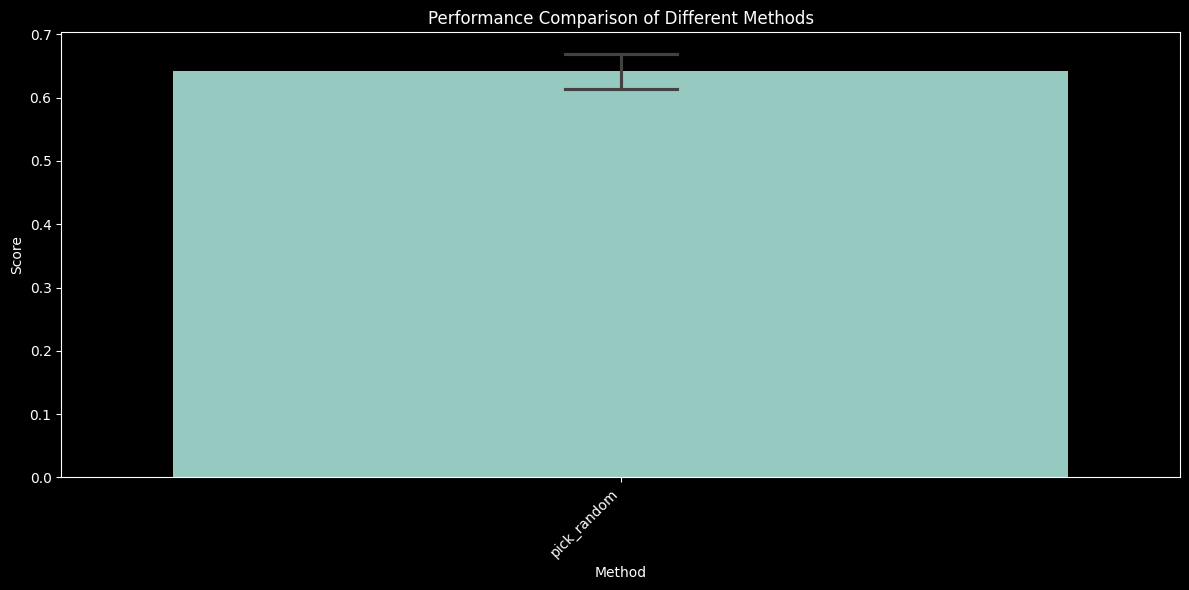

,Method,Score,Model Group,Metric
0,pick_random,0.5944,ensemble_1,squad_acc
1,pick_random,0.6926,ensemble_2,squad_acc
2,pick_random,0.5670,ensemble_3,squad_acc
3,pick_random,0.6608,ensemble_4,squad_acc
4,pick_random,0.6588,ensemble_5,squad_acc
5,pick_random,0.6404,ensemble_6,squad_acc
6,pick_random,0.6830,ensemble_7,squad_acc
7,pick_random,0.6756,ensemble_8,squad_acc
8,pick_random,0.6844,ensemble_9,squad_acc
9,pick_random,0.6046,ensemble_10,squad_acc


In [13]:
plot_exp(RESULTS_DIR / "squad", metric="squad_acc")